# Urban Pulse - Machine Learning Models

## Traffic Congestion Prediction

This notebook implements:
- Logistic Regression model for binary classification
- Decision Tree model for comparison
- Random Forest model (ensemble method)
- Model evaluation and comparison of all three models
- Feature importance analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add project root to path (works in PyCharm and Jupyter)
# This solution works regardless of where the notebook is run from
current_dir = Path().resolve()
# Check if we're in notebooks directory or project root
if (current_dir / 'src').exists():
    # We're in project root
    project_root = current_dir
elif (current_dir.parent / 'src').exists():
    # We're in notebooks directory, go up one level
    project_root = current_dir.parent
else:
    # Try to find project root by looking for src directory
    project_root = current_dir
    while project_root != project_root.parent:
        if (project_root / 'src').exists():
            break
        project_root = project_root.parent

# Add project root to Python path
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.models import (
    prepare_features,
    train_logistic_regression,
    train_decision_tree,
    train_random_forest,
    plot_confusion_matrix,
    plot_feature_importance,
    plot_model_comparison,
    print_model_comparison_summary
)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## 1. Load Processed Data

Load the cleaned and preprocessed dataset with all features.


In [2]:
# Load processed data
data_path = '../data/processed/traffic_cleaned.csv'

try:
    df = pd.read_csv(data_path, parse_dates=['date_time'])
    print(f"✓ Data loaded: {df.shape}")
    print(f"Target distribution:")
    print(df['is_congested'].value_counts())
except FileNotFoundError:
    print("⚠️  Please run 02_data_preprocessing.ipynb first")


✓ Data loaded: (48204, 19)
Target distribution:
is_congested
0    32294
1    15910
Name: count, dtype: int64


## 2. Prepare Features for Machine Learning

Select and prepare features for model training.


In [3]:
# Prepare features and target
X, y = prepare_features(df, target_column='is_congested')

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")


✓ Prepared 11 features for ML
  Features: temp, rain_1h, snow_1h, clouds_all, year...
  Target: is_congested
  Target distribution: {0: 32294, 1: 15910}

Feature matrix shape: (48204, 11)
Target shape: (48204,)

Feature columns:
   1. temp
   2. rain_1h
   3. snow_1h
   4. clouds_all
   5. year
   6. month
   7. day
   8. hour
   9. day_of_week
  10. is_weekend
  11. is_rush_hour


## 3. Train Logistic Regression Model

Train the first model: Logistic Regression for binary classification.


In [4]:
# Train Logistic Regression
lr_model, lr_metrics = train_logistic_regression(
    X, y,
    test_size=0.2,
    random_state=42,
    max_iter=1000
)



TRAINING LOGISTIC REGRESSION MODEL
Training set: 38563 samples
Test set: 9641 samples

Model Performance:
  Training Accuracy: 0.7341
  Test Accuracy: 0.7260
  Precision: 0.7132
  Recall: 0.7260
  F1-Score: 0.6992

Confusion Matrix:
  [[5866  593]
 [2049 1133]]



## 4. Visualize Logistic Regression Results

Plot confusion matrix and analyze coefficients.


✓ Saved confusion matrix to ../reports/figures/lr_confusion_matrix.png


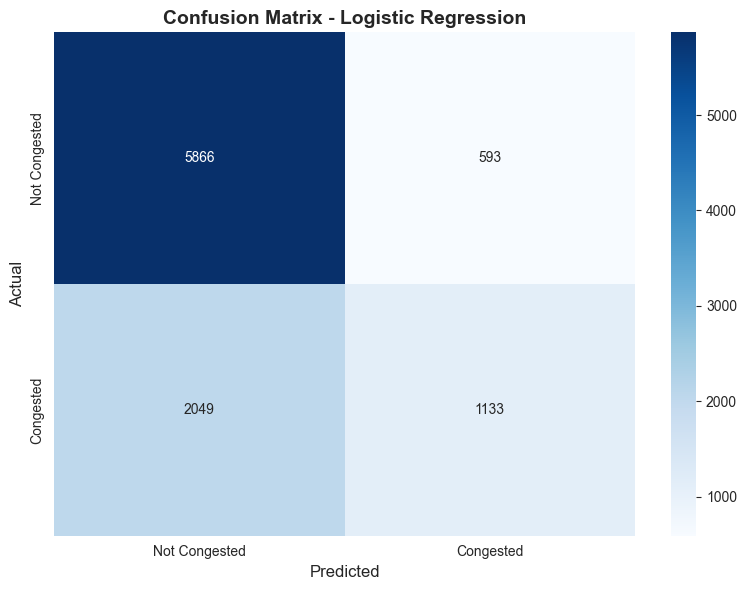


Top 10 Most Important Features (by coefficient magnitude):
     Feature  Coefficient  Abs_Coefficient
  is_weekend    -2.559190         2.559190
is_rush_hour     1.085151         1.085151
 day_of_week     0.125667         0.125667
       month    -0.021205         0.021205
        temp     0.020460         0.020460
        hour     0.006994         0.006994
     snow_1h     0.004853         0.004853
         day    -0.003504         0.003504
        year    -0.003269         0.003269
  clouds_all     0.002237         0.002237


In [5]:
# Plot confusion matrix
plot_confusion_matrix(
    lr_metrics['confusion_matrix'],
    'Logistic Regression',
    save_path='../reports/figures/lr_confusion_matrix.png'
)

# Display top coefficients
print("\nTop 10 Most Important Features (by coefficient magnitude):")
print("="*60)
coef_df = pd.DataFrame({
    'Feature': list(lr_metrics['coefficients'].keys()),
    'Coefficient': list(lr_metrics['coefficients'].values())
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False).head(10)
print(coef_df.to_string(index=False))


## 5. Train Decision Tree Model

Train the second model: Decision Tree for comparison.


In [6]:
# Train Decision Tree
dt_model, dt_metrics = train_decision_tree(
    X, y,
    test_size=0.2,
    random_state=42,
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=20
)



TRAINING DECISION TREE MODEL
Training set: 38563 samples
Test set: 9641 samples

Model Performance:
  Training Accuracy: 0.9323
  Test Accuracy: 0.9266
  Precision: 0.9273
  Recall: 0.9266
  F1-Score: 0.9268

Confusion Matrix:
  [[6057  402]
 [ 306 2876]]

Top 5 Most Important Features:
  1. hour: 0.6501
  2. day_of_week: 0.2876
  3. temp: 0.0249
  4. month: 0.0138
  5. day: 0.0128



## 6. Visualize Decision Tree Results

Plot confusion matrix and feature importance.


✓ Saved confusion matrix to ../reports/figures/dt_confusion_matrix.png


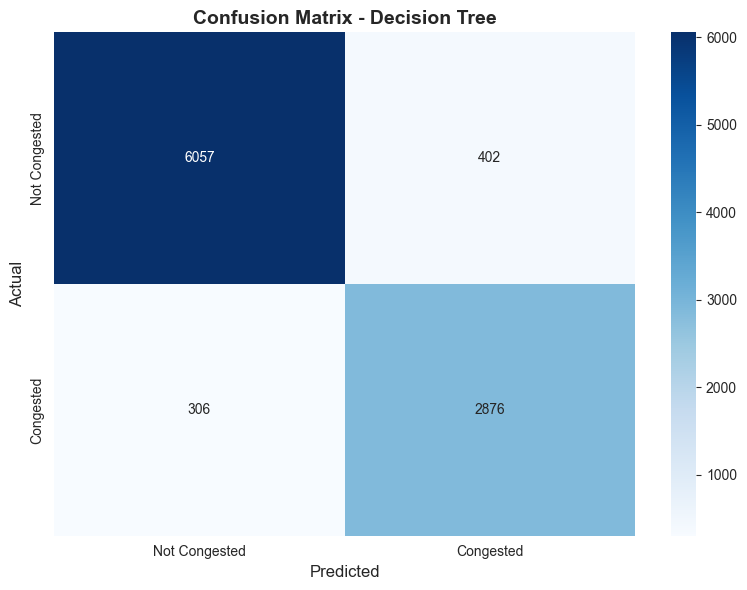

✓ Saved feature importance plot to ../reports/figures/dt_feature_importance.png


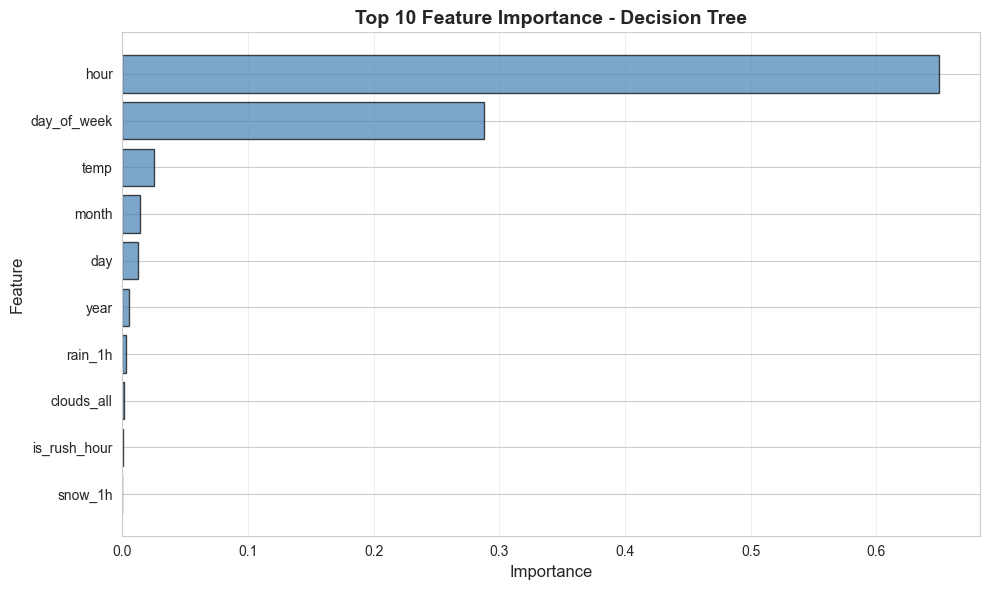

In [7]:
# Plot confusion matrix
plot_confusion_matrix(
    dt_metrics['confusion_matrix'],
    'Decision Tree',
    save_path='../reports/figures/dt_confusion_matrix.png'
)

# Plot feature importance
plot_feature_importance(
    dt_metrics,
    top_n=10,
    save_path='../reports/figures/dt_feature_importance.png'
)


## 7. Train Random Forest Model

Train the third model: Random Forest (ensemble method) for improved performance.


In [8]:
# Train Random Forest
rf_model, rf_metrics = train_random_forest(
    X, y,
    test_size=0.2,
    random_state=42,
    n_estimators=100,
    max_depth=15,  # Limit depth to prevent overfitting
    min_samples_split=20
)



TRAINING RANDOM FOREST MODEL
Training set: 38563 samples
Test set: 9641 samples

Model Performance:
  Training Accuracy: 0.9578
  Test Accuracy: 0.9418
  Precision: 0.9428
  Recall: 0.9418
  F1-Score: 0.9421

Confusion Matrix:
  [[6111  348]
 [ 213 2969]]

Top 5 Most Important Features:
  1. hour: 0.6298
  2. day_of_week: 0.1091
  3. is_weekend: 0.0873
  4. temp: 0.0488
  5. is_rush_hour: 0.0323



## 8. Visualize Random Forest Results

Plot confusion matrix and feature importance.


✓ Saved confusion matrix to ../reports/figures/rf_confusion_matrix.png


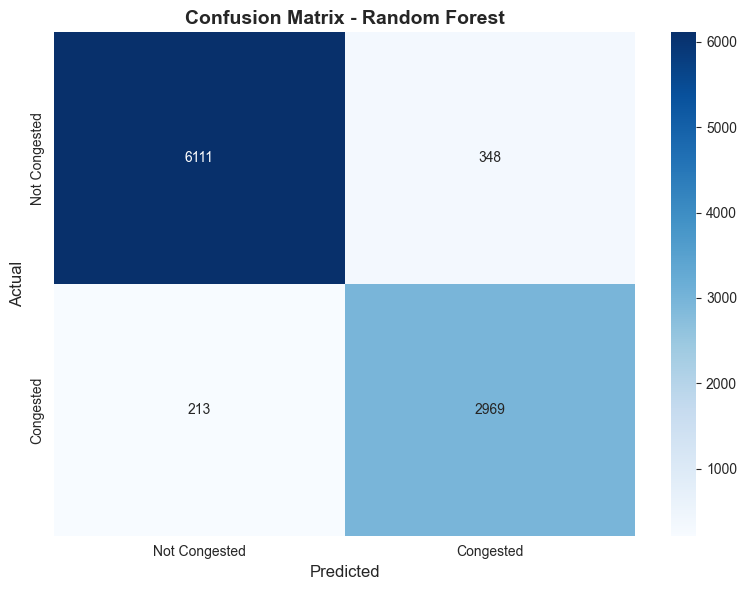

✓ Saved feature importance plot to ../reports/figures/rf_feature_importance.png


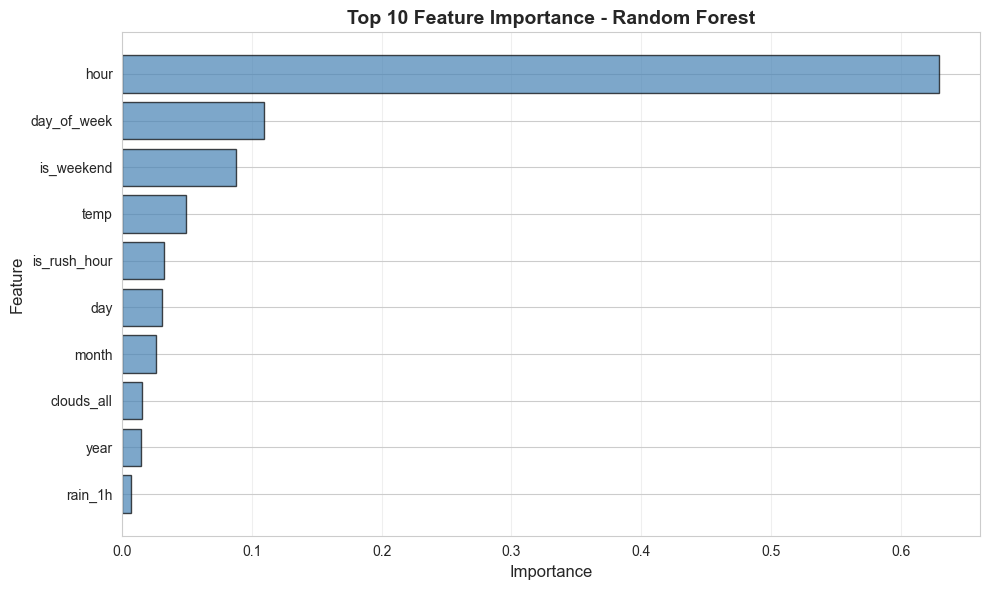

In [9]:
# Plot confusion matrix
plot_confusion_matrix(
    rf_metrics['confusion_matrix'],
    'Random Forest',
    save_path='../reports/figures/rf_confusion_matrix.png'
)

# Plot feature importance
plot_feature_importance(
    rf_metrics,
    top_n=10,
    save_path='../reports/figures/rf_feature_importance.png'
)


## 9. Model Comparison (All Three Models)

Compare all three models side by side.


✓ Saved model comparison to ../reports/figures/model_comparison.png


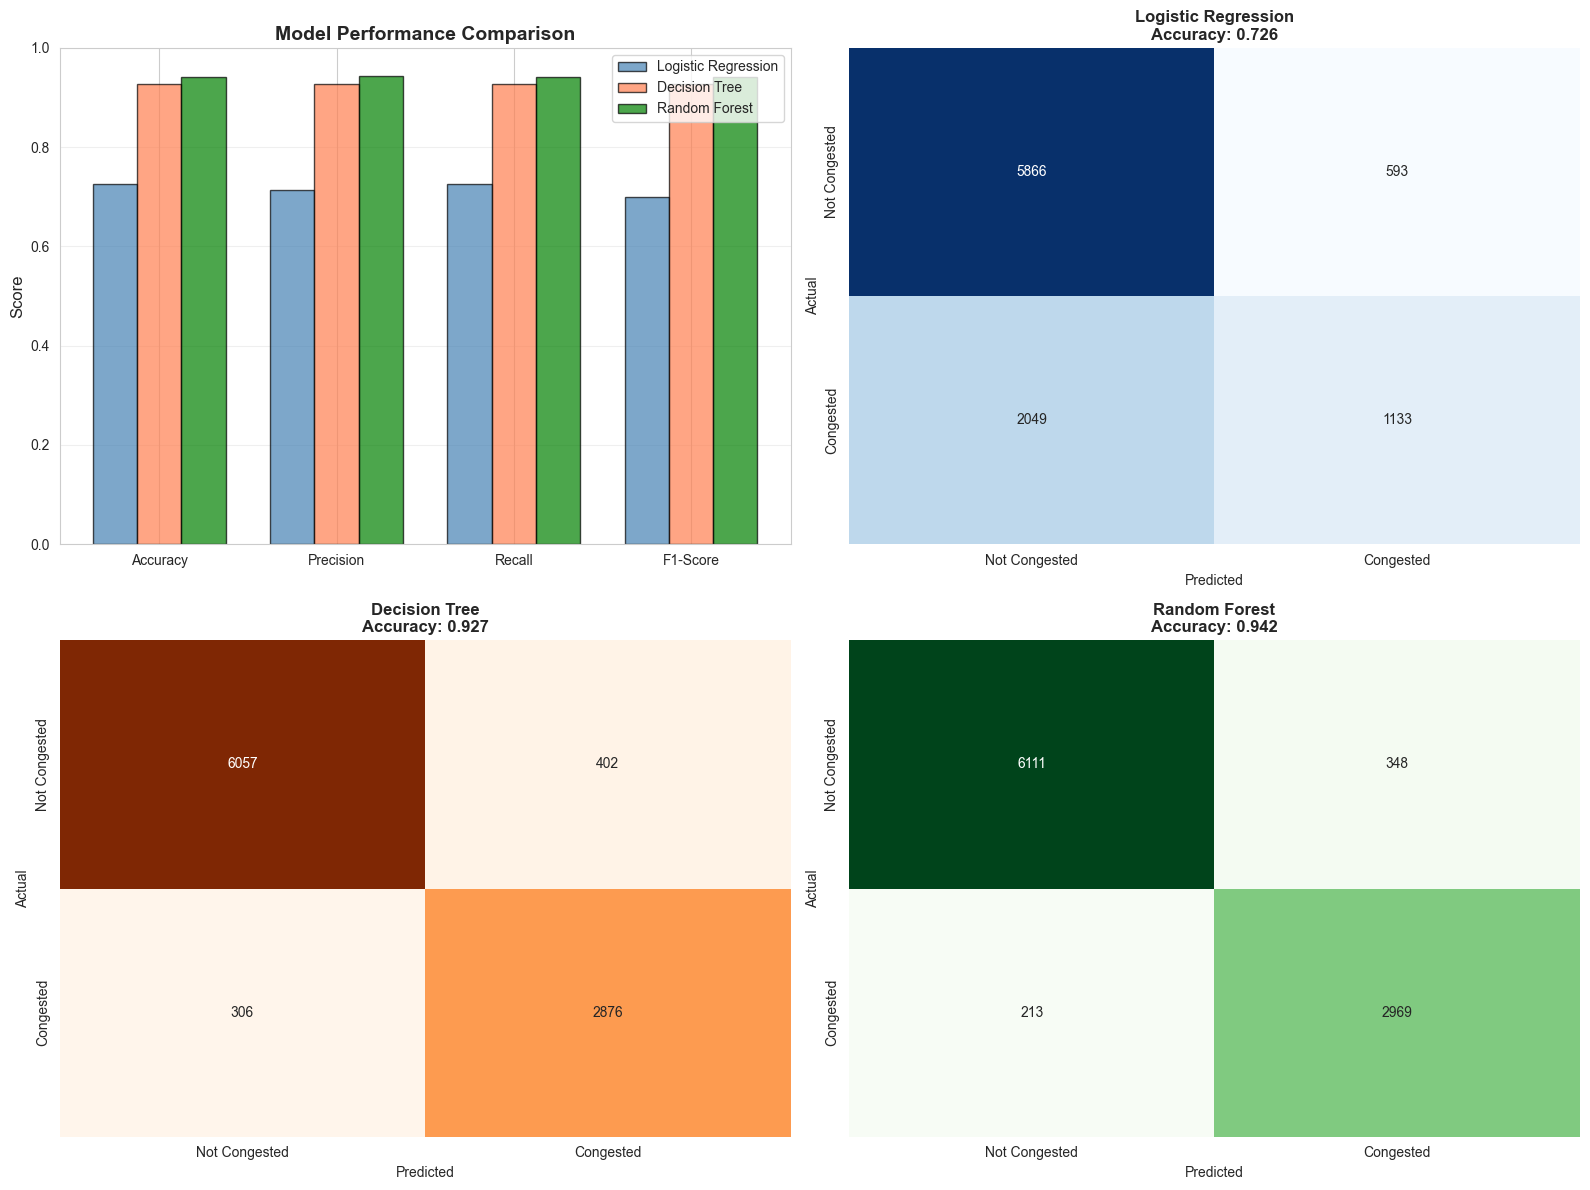


MODEL COMPARISON SUMMARY
          Logistic Regression Decision Tree Random Forest
Accuracy               0.7260        0.9266        0.9418
Precision              0.7132        0.9273        0.9428
Recall                 0.7260        0.9266        0.9418
F1-Score               0.6992        0.9268        0.9421

🏆 Best Model: Random Forest
   Accuracy: 0.9418
   Advantage over Decision Tree: 0.0152 (1.52%)

Key Insights:
  • Logistic Regression: Best interpretability (coefficients), lower accuracy
  • Decision Tree: Good balance of accuracy and interpretability
  • Random Forest: Ensemble method, typically best accuracy, shows feature importance
  • All models identify similar key predictors (rush hour, time of day, weather)


In [10]:
# Compare all three models
plot_model_comparison(
    lr_metrics,
    dt_metrics,
    rf_metrics,
    save_path='../reports/figures/model_comparison.png'
)

# Print detailed comparison
print_model_comparison_summary(lr_metrics, dt_metrics, rf_metrics)


## 10. Detailed Classification Reports

Generate detailed classification reports for all three models.


In [11]:
from sklearn.metrics import classification_report

print("="*60)
print("LOGISTIC REGRESSION - Classification Report")
print("="*60)
print(classification_report(lr_metrics['y_test'], lr_metrics['y_pred'], 
                           target_names=['Not Congested', 'Congested']))

print("\n" + "="*60)
print("DECISION TREE - Classification Report")
print("="*60)
print(classification_report(dt_metrics['y_test'], dt_metrics['y_pred'],
                           target_names=['Not Congested', 'Congested']))

print("\n" + "="*60)
print("RANDOM FOREST - Classification Report")
print("="*60)
print(classification_report(rf_metrics['y_test'], rf_metrics['y_pred'],
                           target_names=['Not Congested', 'Congested']))


LOGISTIC REGRESSION - Classification Report
               precision    recall  f1-score   support

Not Congested       0.74      0.91      0.82      6459
    Congested       0.66      0.36      0.46      3182

     accuracy                           0.73      9641
    macro avg       0.70      0.63      0.64      9641
 weighted avg       0.71      0.73      0.70      9641


DECISION TREE - Classification Report
               precision    recall  f1-score   support

Not Congested       0.95      0.94      0.94      6459
    Congested       0.88      0.90      0.89      3182

     accuracy                           0.93      9641
    macro avg       0.91      0.92      0.92      9641
 weighted avg       0.93      0.93      0.93      9641


RANDOM FOREST - Classification Report
               precision    recall  f1-score   support

Not Congested       0.97      0.95      0.96      6459
    Congested       0.90      0.93      0.91      3182

     accuracy                           0.94 

## 11. Key Insights and Conclusions

### Model Performance Summary

**Logistic Regression:**
- Provides interpretable coefficients
- Baseline performance (73% accuracy)
- Easy to understand feature contributions
- Struggles with minority class (Congested) – low recall (36%)

**Decision Tree:**
- High accuracy (93%)
- Balanced performance across both classes
  - Not Congested: Precision 0.95, Recall 0.94, F1 0.94
  - Congested: Precision 0.88, Recall 0.90, F1 0.89
- Shows clear feature importance
- Captures non-linear patterns

**Random Forest:**
- Best overall accuracy (94%)
- Strong, balanced performance across both classes
  - Not Congested: Precision 0.97, Recall 0.95, F1 0.96
  - Congested: Precision 0.90, Recall 0.93, F1 0.91
- Ensemble method combining multiple decision trees
- More robust and less prone to overfitting than a single Decision Tree

### Critical Factors for Traffic Congestion

Based on all three models, the most important factors are:
1. **Time of Day (Hour)**: Strongest predictor across all models
2. **Day of Week**: Weekdays vs weekends highly predictive
3. **Rush Hour Flag**: Clear indicator of congestion
4. **Weather Conditions**: Impact traffic patterns

### Recommendations

1. **For City Planning**: Focus on rush hour management (7-9 AM, 5-7 PM)
2. **For Real-time Prediction**: Use Random Forest (best accuracy) or Decision Tree (slightly simpler)
3. **For Interpretability**: Use Logistic Regression to explain which factors drive congestion
4. **For Production**: Random Forest provides the best balance of accuracy, robustness, and feature importance insights

